In [2]:
!kaggle datasets download -d farjanakabirsamanta/osteoarthritis-prediction

Dataset URL: https://www.kaggle.com/datasets/farjanakabirsamanta/osteoarthritis-prediction
License(s): other
osteoarthritis-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/osteoarthritis-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/osteoarthritis-prediction.zip'

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/train/train',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/Valid/Valid',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary')

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Reshape
conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))


In [24]:
model=Sequential()
model.add(conv_base)

model.add(Flatten())




model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [46]:
history=model.fit(train_generator,validation_data=validation_generator,epochs=30, callbacks=[early_stopping])

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 109s 908ms/step - accuracy: 0.5257 - loss: 0.8872 - val_accuracy: 0.3266 - val_loss: 0.7454
Epoch 2/30
53/74 ━━━━━━━━━━━━━━━━━━━━ 10s 480ms/step - accuracy: 0.5565 - loss: 0.7737

KeyboardInterrupt: 

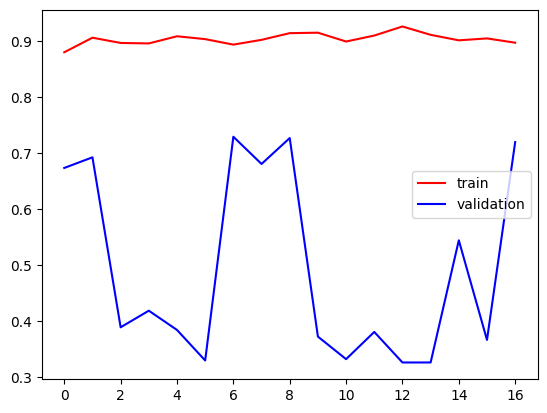

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

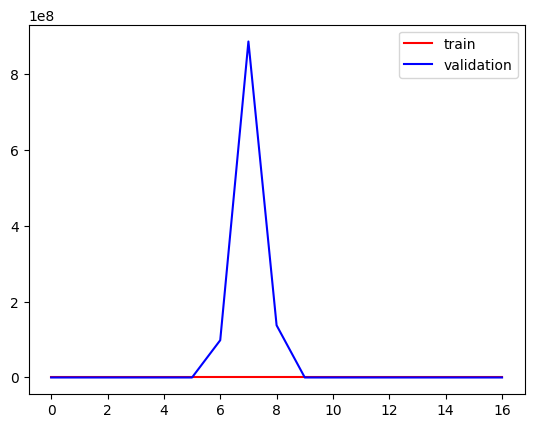

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [7]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Reshape

In [8]:
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [20]:
model=Sequential()
model.add(conv_base)

model.add(Flatten())



model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Dense(1,activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [24]:
history=model.fit(train_generator,validation_data=validation_generator,epochs=30, callbacks=[early_stopping])

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 164s 963ms/step - accuracy: 0.5235 - loss: 0.8663 - val_accuracy: 0.6521 - val_loss: 2.2381
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 473ms/step - accuracy: 0.5335 - loss: 0.7849 - val_accuracy: 0.6240 - val_loss: 3.2163
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 463ms/step - accuracy: 0.5746 - loss: 0.7313 - val_accuracy: 0.6381 - val_loss: 0.8854
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 483ms/step - accuracy: 0.6158 - loss: 0.6739 - val_accuracy: 0.5569 - val_loss: 0.6371
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 481ms/step - accuracy: 0.5617 - loss: 0.6793 - val_accuracy: 0.3729 - val_loss: 0.7174
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 481ms/step - accuracy: 0.6167 - loss: 0.6743 - val_accuracy: 0.6303 - val_loss: 1.8632
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s 477ms/step - accuracy: 0.6203 - loss: 0.6656 - val_accuracy: 0.6708 - val_loss: 0.7806
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s 487ms/step - accuracy: 0.6613 - loss: 0.6393 - val_acc

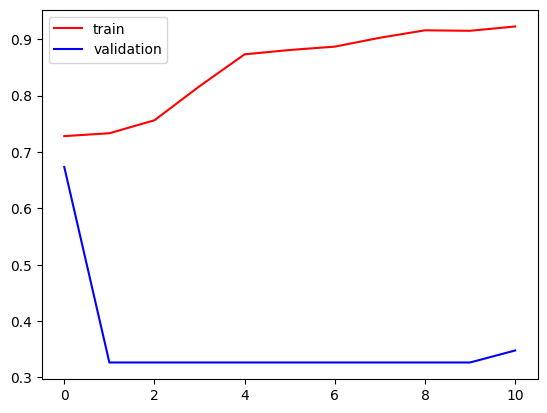

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()